SREELAKSHMI CV - 21BDA39

QUESTION 1

Have you come across Grid Search Cross Validation? Fit any two models covered in previous 
classes and optimize them using Grid search CV.

In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [2]:
iris = datasets.load_iris()

In [3]:
X, y = iris.data, iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [5]:
clf = RandomForestClassifier(n_estimators = 100, random_state = 18).fit(X_train, y_train)

In [6]:
prediction = clf.predict(X_test)

In [7]:
confusion_matrix(y_test, prediction)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)

In [8]:
accuracy_score(y_test, prediction)

0.98

In [9]:
f1_score(y_test,prediction, average="micro")

0.98

In [10]:
grid = { 
    'n_estimators': [200,300,400,500],
    'max_features': ['sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy'],
    'random_state' : [18]
}

In [11]:
rf_cv = GridSearchCV(estimator=RandomForestClassifier(), param_grid=grid, cv= 5)
rf_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [200, 300, 400, 500],
                         'random_state': [18]})

In [12]:
rf_cv.best_params_

{'criterion': 'gini',
 'max_depth': 4,
 'max_features': 'sqrt',
 'n_estimators': 200,
 'random_state': 18}

In [14]:
clf = RandomForestClassifier(n_estimators = 200, max_depth=4, max_features='sqrt' , random_state = 18).fit(X_train, y_train)

In [15]:
prediction = clf.predict(X_test)

In [16]:
confusion_matrix(y_test, prediction)

array([[19,  0,  0],
       [ 0, 15,  0],
       [ 0,  1, 15]], dtype=int64)

In [17]:
accuracy_score(y_test, prediction)

0.98

In [18]:
f1_score(y_test,prediction, average="micro")

0.98

In [19]:
clf = DecisionTreeClassifier(random_state=0)

In [20]:
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

In [21]:
prediction = clf.predict(X_test)

In [22]:
confusion_matrix(y_test, prediction)

array([[19,  0,  0],
       [ 0, 14,  1],
       [ 0,  1, 15]], dtype=int64)

In [23]:
accuracy_score(y_test, prediction)

0.96

In [24]:
f1_score(y_test,prediction, average="micro")

0.96

QUESTION 3

Fit a CNN model on the dataset which has been assigned to you. Print a classification report to 
see the model metrics on train and test datasets

https://www.kaggle.com/datasets/ronanpickell/b200c-lego-classification-dataset

In [25]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.layers import Dense,Flatten,Dropout,Conv2D,MaxPooling2D,BatchNormalization
from tensorflow.keras.optimizers import Adam
import keras
from keras.models import Sequential
from sklearn.metrics import classification_report, log_loss, accuracy_score
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [29]:
data_dir = r'C:\Users\91807\OneDrive\Desktop\64'

In [30]:
Name=[]
for file in os.listdir(data_dir):
    Name+=[file]
print(Name)
print(len(Name))

['10247', '11090', '11211', '11212', '11214', '11458', '11476', '11477', '14704', '14719', '14769', '15068', '15070', '15100', '15379', '15392', '15535', '15573', '15712', '18651', '18654', '18674', '18677', '20482', '22388', '22885', '2357', '2412b', '2420', '24201', '24246', '2429', '2430', '2431', '2432', '2436', '2445', '2450', '2454', '2456', '24866', '25269', '2540', '26047', '2654', '26601', '26603', '26604', '2780', '27925', '28192', '2877', '3001', '3002', '3003', '3004', '3005', '3008', '3009', '3010', '30136', '3020', '3021', '3022', '3023', '3024', '3031', '3032', '3034', '3035', '3037', '30374', '3039', '3040', '30413', '30414', '3062b', '3065', '3068b', '3069b', '3070b', '32000', '32013', '32028', '32054', '32062', '32064', '32073', '32123', '32140', '32184', '32278', '32316', '3245c', '32523', '32524', '32525', '32526', '32607', '32952', '33291', '33909', '34103', '3460', '35480', '3622', '3623', '3660', '3665', '3666', '3673', '3700', '3701', '3705', '3710', '3713', '37

In [31]:
N=[]
for i in range(len(Name)):
    N+=[i]
    
normal_mapping=dict(zip(Name,N)) 
reverse_mapping=dict(zip(N,Name)) 

In [32]:
datax0=[]
datay0=[]
count=0
for file in tqdm(Name):
    path=os.path.join(data_dir,file)
    for im in os.listdir(path):
        image=load_img(os.path.join(path,im), grayscale=False, color_mode='rgb', target_size=(10,10))
        image=img_to_array(image)
        image=image/255.0
        datax0.append(image)
        datay0.append(count)
    count=count+1

100%|████████████████████████████████████████████████████████████████████████████| 200/200 [13:38:21<00:00, 245.51s/it]


In [33]:
n=len(datax0)
M=[]
for i in range(n):
    M+=[i]
random.shuffle(M)

In [34]:
datax1=np.array(datax0)
datay1=np.array(datay0)

In [35]:
trainx0=datax1[M[0:(n//4)*3]]
testx0=datax1[M[(n//4)*3:]]
trainy0=datay1[M[0:(n//4)*3]]
testy0=datay1[M[(n//4)*3:]]

In [36]:
trainy2=to_categorical(trainy0)
X_train=np.array(trainx0).reshape(-1,10,10,3)
y_train=np.array(trainy2)

In [37]:
X_test=np.array(testx0).reshape(-1,10,10,3)

In [38]:
trainx,testx,trainy,testy=train_test_split(X_train,y_train,test_size=0.2,random_state=44)

In [39]:
print(trainx.shape)
print(testx.shape)
print(trainy.shape)
print(testy.shape)

(480000, 10, 10, 3)
(120000, 10, 10, 3)
(480000, 200)
(120000, 200)


In [40]:
model = Sequential()
model.add(Conv2D(32,(4,4),input_shape = (10,10,3),activation = 'relu'))
model.add(Conv2D(32,(2,2),activation = 'relu'))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(400, activation='relu'))
model.add(Dense(200, activation='softmax'))

In [41]:
model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 7, 7, 32)          1568      
                                                                 
 conv2d_1 (Conv2D)           (None, 6, 6, 32)          4128      
                                                                 
 dropout (Dropout)           (None, 6, 6, 32)          0         
                                                                 
 flatten (Flatten)           (None, 1152)              0         
                                                                 
 dense (Dense)               (None, 400)               461200    
                                                                 
 dense_1 (Dense)             (None, 200)               80200     
                                                                 
Total params: 547,096
Trainable params: 547,096
Non-trai

In [43]:
his = model.fit(X_train, y_train, validation_split=0.2, epochs=30, batch_size=64, verbose=2)

Epoch 1/30
7500/7500 - 190s - loss: 3.8280 - accuracy: 0.1545 - val_loss: 3.1391 - val_accuracy: 0.2511 - 190s/epoch - 25ms/step
Epoch 2/30
7500/7500 - 156s - loss: 3.0022 - accuracy: 0.2769 - val_loss: 2.7476 - val_accuracy: 0.3244 - 156s/epoch - 21ms/step
Epoch 3/30
7500/7500 - 155s - loss: 2.7246 - accuracy: 0.3268 - val_loss: 2.5573 - val_accuracy: 0.3616 - 155s/epoch - 21ms/step
Epoch 4/30
7500/7500 - 153s - loss: 2.5649 - accuracy: 0.3583 - val_loss: 2.4259 - val_accuracy: 0.3862 - 153s/epoch - 20ms/step
Epoch 5/30
7500/7500 - 157s - loss: 2.4578 - accuracy: 0.3780 - val_loss: 2.3954 - val_accuracy: 0.3941 - 157s/epoch - 21ms/step
Epoch 6/30
7500/7500 - 149s - loss: 2.3768 - accuracy: 0.3938 - val_loss: 2.3449 - val_accuracy: 0.4042 - 149s/epoch - 20ms/step
Epoch 7/30
7500/7500 - 153s - loss: 2.3145 - accuracy: 0.4063 - val_loss: 2.2681 - val_accuracy: 0.4180 - 153s/epoch - 20ms/step
Epoch 8/30
7500/7500 - 151s - loss: 2.2619 - accuracy: 0.4165 - val_loss: 2.2588 - val_accuracy: 

In [44]:
y_pred=model.predict(testx)
pred=np.argmax(y_pred,axis=1)
ground = np.argmax(testy,axis=1)
print(classification_report(ground,pred))

3750/3750 [==============================] - 23s 6ms/step
              precision    recall  f1-score   support

           0       0.51      0.57      0.54       582
           1       0.60      0.69      0.64       610
           2       0.41      0.17      0.24       601
           3       0.70      0.75      0.73       625
           4       0.42      0.45      0.44       593
           5       0.58      0.34      0.43       637
           6       0.57      0.78      0.66       581
           7       0.52      0.32      0.39       576
           8       0.80      0.71      0.75       567
           9       0.74      0.77      0.75       588
          10       0.79      0.86      0.82       608
          11       0.41      0.62      0.50       624
          12       0.31      0.37      0.33       617
          13       0.65      0.72      0.68       621
          14       0.78      0.77      0.78       577
          15       0.40      0.54      0.46       589
          16       0.90

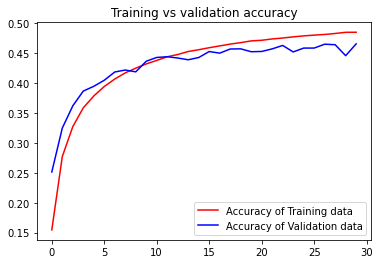

<Figure size 432x288 with 0 Axes>

In [45]:
get_acc = his.history['accuracy']
value_acc = his.history['val_accuracy']
get_loss = his.history['loss']
validation_loss = his.history['val_loss']

epochs = range(len(get_acc))
plt.plot(epochs, get_acc, 'r', label='Accuracy of Training data')
plt.plot(epochs, value_acc, 'b', label='Accuracy of Validation data')
plt.title('Training vs validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
epochs = range(len(get_loss))
plt.plot(epochs, get_loss, 'r', label='Loss of Training data')
plt.plot(epochs, validation_loss, 'b', label='Loss of Validation data')
plt.title('Training vs validation loss')
plt.legend(loc=0)
plt.figure()
plt.show()

In [ ]:
pred2=model.predict(X_test)
print(pred2[0:10])

PRED=[]
for item in pred2:
    value2=np.argmax(item)      
    PRED+=[value2]
print(PRED[0:10])

In [ ]:
ANS=list(testy0)
ANS[0:10]

In [ ]:
accuracy=accuracy_score(ANS,PRED)
print(accuracy)